<a href="https://colab.research.google.com/github/Renee0330/bob_study_allFiles/blob/main/overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier       # KNN
from sklearn.naive_bayes import GaussianNB               # 朴素贝叶斯（高斯）
from sklearn.tree import DecisionTreeClassifier          # 决策树
from sklearn.ensemble import RandomForestClassifier      # 随机森林
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.base import BaseEstimator, OutlierMixin
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from imblearn import FunctionSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. Load Data



In [4]:
df = pd.read_csv("data/train.csv")

X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()

num_features = X.select_dtypes(include="number").columns.tolist()
cat_features = [c for c in X.columns if c not in num_features]

In [6]:
# 查看基本信息（#instances,#non-null,dtype）
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10853 entries, 0 to 10852
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Num_Col1        9768 non-null   float64
 1   Num_Col2        9768 non-null   float64
 2   Num_Col3        9768 non-null   float64
 3   Num_Col4        9768 non-null   float64
 4   Num_Col5        9768 non-null   float64
 5   Num_Col6        9768 non-null   float64
 6   Num_Col7        9768 non-null   float64
 7   Num_Col8        9768 non-null   float64
 8   Num_Col9        9768 non-null   float64
 9   Num_Col10       9768 non-null   float64
 10  Num_Col11       9768 non-null   float64
 11  Num_Col12       9768 non-null   float64
 12  Num_Col13       9768 non-null   float64
 13  Num_Col14       9768 non-null   float64
 14  Num_Col15       9768 non-null   float64
 15  Num_Col16       9768 non-null   float64
 16  Num_Col17       9768 non-null   float64
 17  Num_Col18       9768 non-null  

In [7]:
# 查看缺失值的情况（数量、总数、比例）
# 是否存在缺失值
has_nan = df.isnull().values.any()
print(f"是否存在缺失值: {has_nan}")
# 各列缺失值数量
missing_per_column = df.isnull().sum()
print("\n每列的缺失值数量：")
print(missing_per_column[missing_per_column > 0])  # 只显示有缺失的列
# 缺失值总数
total_missing = missing_per_column.sum()
print(f"\n总缺失值个数：{total_missing}")
# 缺失值比例（可选）
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("\n缺失值比例（按列）：")
print(missing_ratio[missing_ratio > 0])

是否存在缺失值: True

每列的缺失值数量：
Num_Col1     1085
Num_Col2     1085
Num_Col3     1085
Num_Col4     1085
Num_Col5     1085
Num_Col6     1085
Num_Col7     1085
Num_Col8     1085
Num_Col9     1085
Num_Col10    1085
Num_Col11    1085
Num_Col12    1085
Num_Col13    1085
Num_Col14    1085
Num_Col15    1085
Num_Col16    1085
Num_Col17    1085
Num_Col18    1085
Num_Col19    1085
Num_Col20    1085
Num_Col21    1085
Num_Col22    1085
Num_Col23    1085
Num_Col24    1085
Num_Col25    1085
Nom_Col26    1085
Nom_Col27    1085
Nom_Col28    1085
Nom_Col29    1085
Nom_Col30    1085
Nom_Col31    1085
Nom_Col32    1085
Nom_Col33    1085
Nom_Col34    1085
Nom_Col35    1085
Nom_Col36    1085
Nom_Col37    1085
Nom_Col38    1085
Nom_Col39    1085
Nom_Col40    1085
Nom_Col41    1085
Nom_Col42    1085
Nom_Col43    1085
dtype: int64

总缺失值个数：46655

缺失值比例（按列）：
Num_Col1     0.099972
Num_Col2     0.099972
Num_Col3     0.099972
Num_Col4     0.099972
Num_Col5     0.099972
Num_Col6     0.099972
Num_Col7     0.099972
Num_Col8

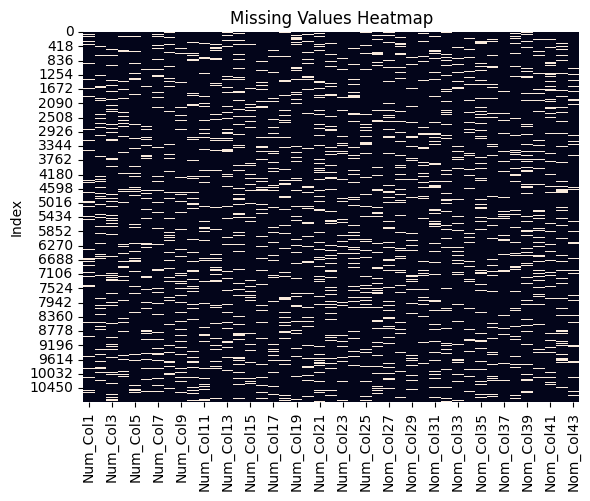

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 seaborn 库的 heatmap 函数来可视化数据集中的缺失值
# cbar=False 表示不显示颜色条
ax = sns.heatmap(X.isnull(), cbar=False)

# 设置图表标题
plt.ylabel('Index')
plt.title("Missing Values Heatmap")

# 显示图表
plt.show()

In [9]:
for col in cat_features:
  print(col, "\t", len(X[col].unique()), "\t", X[col].unique())

Nom_Col26 	 8 	 ['C0_c0' 'C0_c1' 'C0_c2' 'C0_c3' nan 'C0_c5' 'C0_c4' 'C0_c6']
Nom_Col27 	 17 	 ['C1_c0' 'C1_c1' 'C1_c2' 'C1_c3' 'C1_c4' 'C1_c5' 'C1_c6' 'C1_c7' nan
 'C1_c8' 'C1_c9' 'C1_c10' 'C1_c11' 'C1_c12' 'C1_c13' 'C1_c14' 'C1_c15']
Nom_Col28 	 8 	 ['C2_c0' 'C2_c1' 'C2_c2' 'C2_c3' 'C2_c4' nan 'C2_c5' 'C2_c6']
Nom_Col29 	 15 	 ['C3_c0' 'C3_c1' nan 'C3_c2' 'C3_c3' 'C3_c4' 'C3_c5' 'C3_c7' 'C3_c6'
 'C3_c8' 'C3_c9' 'C3_c10' 'C3_c11' 'C3_c12' 'C3_c13']
Nom_Col30 	 7 	 ['C4_c0' 'C4_c1' 'C4_c2' 'C4_c3' nan 'C4_c5' 'C4_c4']
Nom_Col31 	 6 	 ['C5_c0' 'C5_c1' 'C5_c2' nan 'C5_c3' 'C5_c4']
Nom_Col32 	 3 	 ['C6_c0' 'C6_c1' nan]
Nom_Col33 	 41 	 ['C7_c0' nan 'C7_c1' 'C7_c2' 'C7_c3' 'C7_c4' 'C7_c6' 'C7_c7' 'C7_c8'
 'C7_c9' 'C7_c10' 'C7_c11' 'C7_c12' 'C7_c13' 'C7_c14' 'C7_c15' 'C7_c16'
 'C7_c17' 'C7_c5' 'C7_c18' 'C7_c19' 'C7_c20' 'C7_c21' 'C7_c22' 'C7_c23'
 'C7_c24' 'C7_c25' 'C7_c26' 'C7_c27' 'C7_c29' 'C7_c30' 'C7_c28' 'C7_c32'
 'C7_c33' 'C7_c31' 'C7_c34' 'C7_c35' 'C7_c36' 'C7_c37' 'C7_c38' 'C7_c39']

In [11]:
X.head()

,Num_Col1,Num_Col2,Num_Col3,Num_Col4,Num_Col5,Num_Col6,Num_Col7,Num_Col8,Num_Col9,Num_Col10,...,Nom_Col34,Nom_Col35,Nom_Col36,Nom_Col37,Nom_Col38,Nom_Col39,Nom_Col40,Nom_Col41,Nom_Col42,Nom_Col43
0,0.033869,0.001056,-9.926405,0.070394,0.000788,0.000097,-0.059231,0.000739,15.473141,NaN,...,C8_c0,C9_c0,C10_c0,C11_c0,C12_c0,C13_c0,C14_c0,C15_c0,C16_c0,C17_c0
1,0.053218,NaN,-0.038132,0.002473,0.000337,0.000445,0.022612,-0.000392,0.849532,-0.000488,...,C8_c1,C9_c1,C10_c1,C11_c0,C12_c0,C13_c1,C14_c1,C15_c1,C16_c1,C17_c1
2,NaN,0.001407,-0.018618,0.057979,NaN,0.000777,0.034021,NaN,-17.116814,0.000838,...,C8_c2,NaN,C10_c2,NaN,C12_c1,NaN,NaN,C15_c1,C16_c2,C17_c2
3,0.038971,0.012082,0.038099,0.053880,0.000995,0.000308,0.072476,0.001358,-14.968760,0.002161,...,NaN,C9_c0,C10_c3,C11_c2,C12_c1,C13_c0,C14_c1,C15_c2,C16_c2,C17_c3
4,0.000503,0.011750,-0.019909,0.054219,0.000177,-0.000018,-0.012990,-0.001080,15.014805,-0.000160,...,C8_c4,C9_c1,C10_c4,C11_c1,C12_c2,NaN,C14_c3,C15_c1,C16_c1,C17_c4


In [12]:
X.describe()

,Num_Col1,Num_Col2,Num_Col3,Num_Col4,Num_Col5,Num_Col6,Num_Col7,Num_Col8,Num_Col9,Num_Col10,...,Num_Col16,Num_Col17,Num_Col18,Num_Col19,Num_Col20,Num_Col21,Num_Col22,Num_Col23,Num_Col24,Num_Col25
count,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,...,9768.000000,9.768000e+03,9768.000000,9768.000000,9768.000000,9768.000000,9.768000e+03,9768.000000,9768.000000,9768.000000
mean,0.029562,0.011932,-0.114095,-0.201962,0.000407,-0.000004,-0.001321,-0.000002,-0.026534,0.000007,...,0.000184,-6.092210e-09,0.000003,0.048619,-0.023529,0.074605,4.709995e-07,-0.011139,0.091275,-0.064024
std,0.018302,0.007123,0.777991,0.925610,0.000123,0.000993,0.100835,0.000993,10.089639,0.001011,...,0.010094,1.003829e-03,0.000990,9.931712,10.056757,9.974422,9.942902e-04,9.982573,10.043132,9.879577
min,-0.007180,-0.001422,-10.170918,-8.635131,-0.000009,-0.004342,-0.373079,-0.003680,-36.768642,-0.003837,...,-0.036085,-4.133633e-03,-0.004181,-35.953217,-41.294619,-43.274390,-4.030400e-03,-37.699793,-40.606047,-34.288045
25%,0.015220,0.007011,-0.067550,-0.073861,0.000380,-0.000670,-0.068866,-0.000664,-6.828499,-0.000667,...,-0.006585,-6.640254e-04,-0.000674,-6.657168,-6.639188,-6.581906,-6.602990e-04,-6.830285,-6.759379,-6.723944
50%,0.027563,0.011149,-0.009784,-0.006601,0.000400,-0.000017,-0.001261,-0.000004,-0.057933,0.000006,...,0.000362,-7.190941e-07,0.000008,0.011887,-0.063011,0.071125,-2.287133e-06,0.022205,0.110396,-0.049094
75%,0.041695,0.015232,0.044686,0.057501,0.000454,0.000663,0.067385,0.000672,6.798960,0.000679,...,0.006952,6.893536e-04,0.000683,6.757489,6.828271,6.711849,6.710959e-04,6.843720,6.801672,6.447034
max,0.103033,0.100714,0.301574,0.343910,0.001026,0.003808,0.435456,0.003730,36.258796,0.004252,...,0.038684,4.146123e-03,0.003765,35.204866,35.401661,37.361958,3.382121e-03,34.033876,38.408416,42.190855


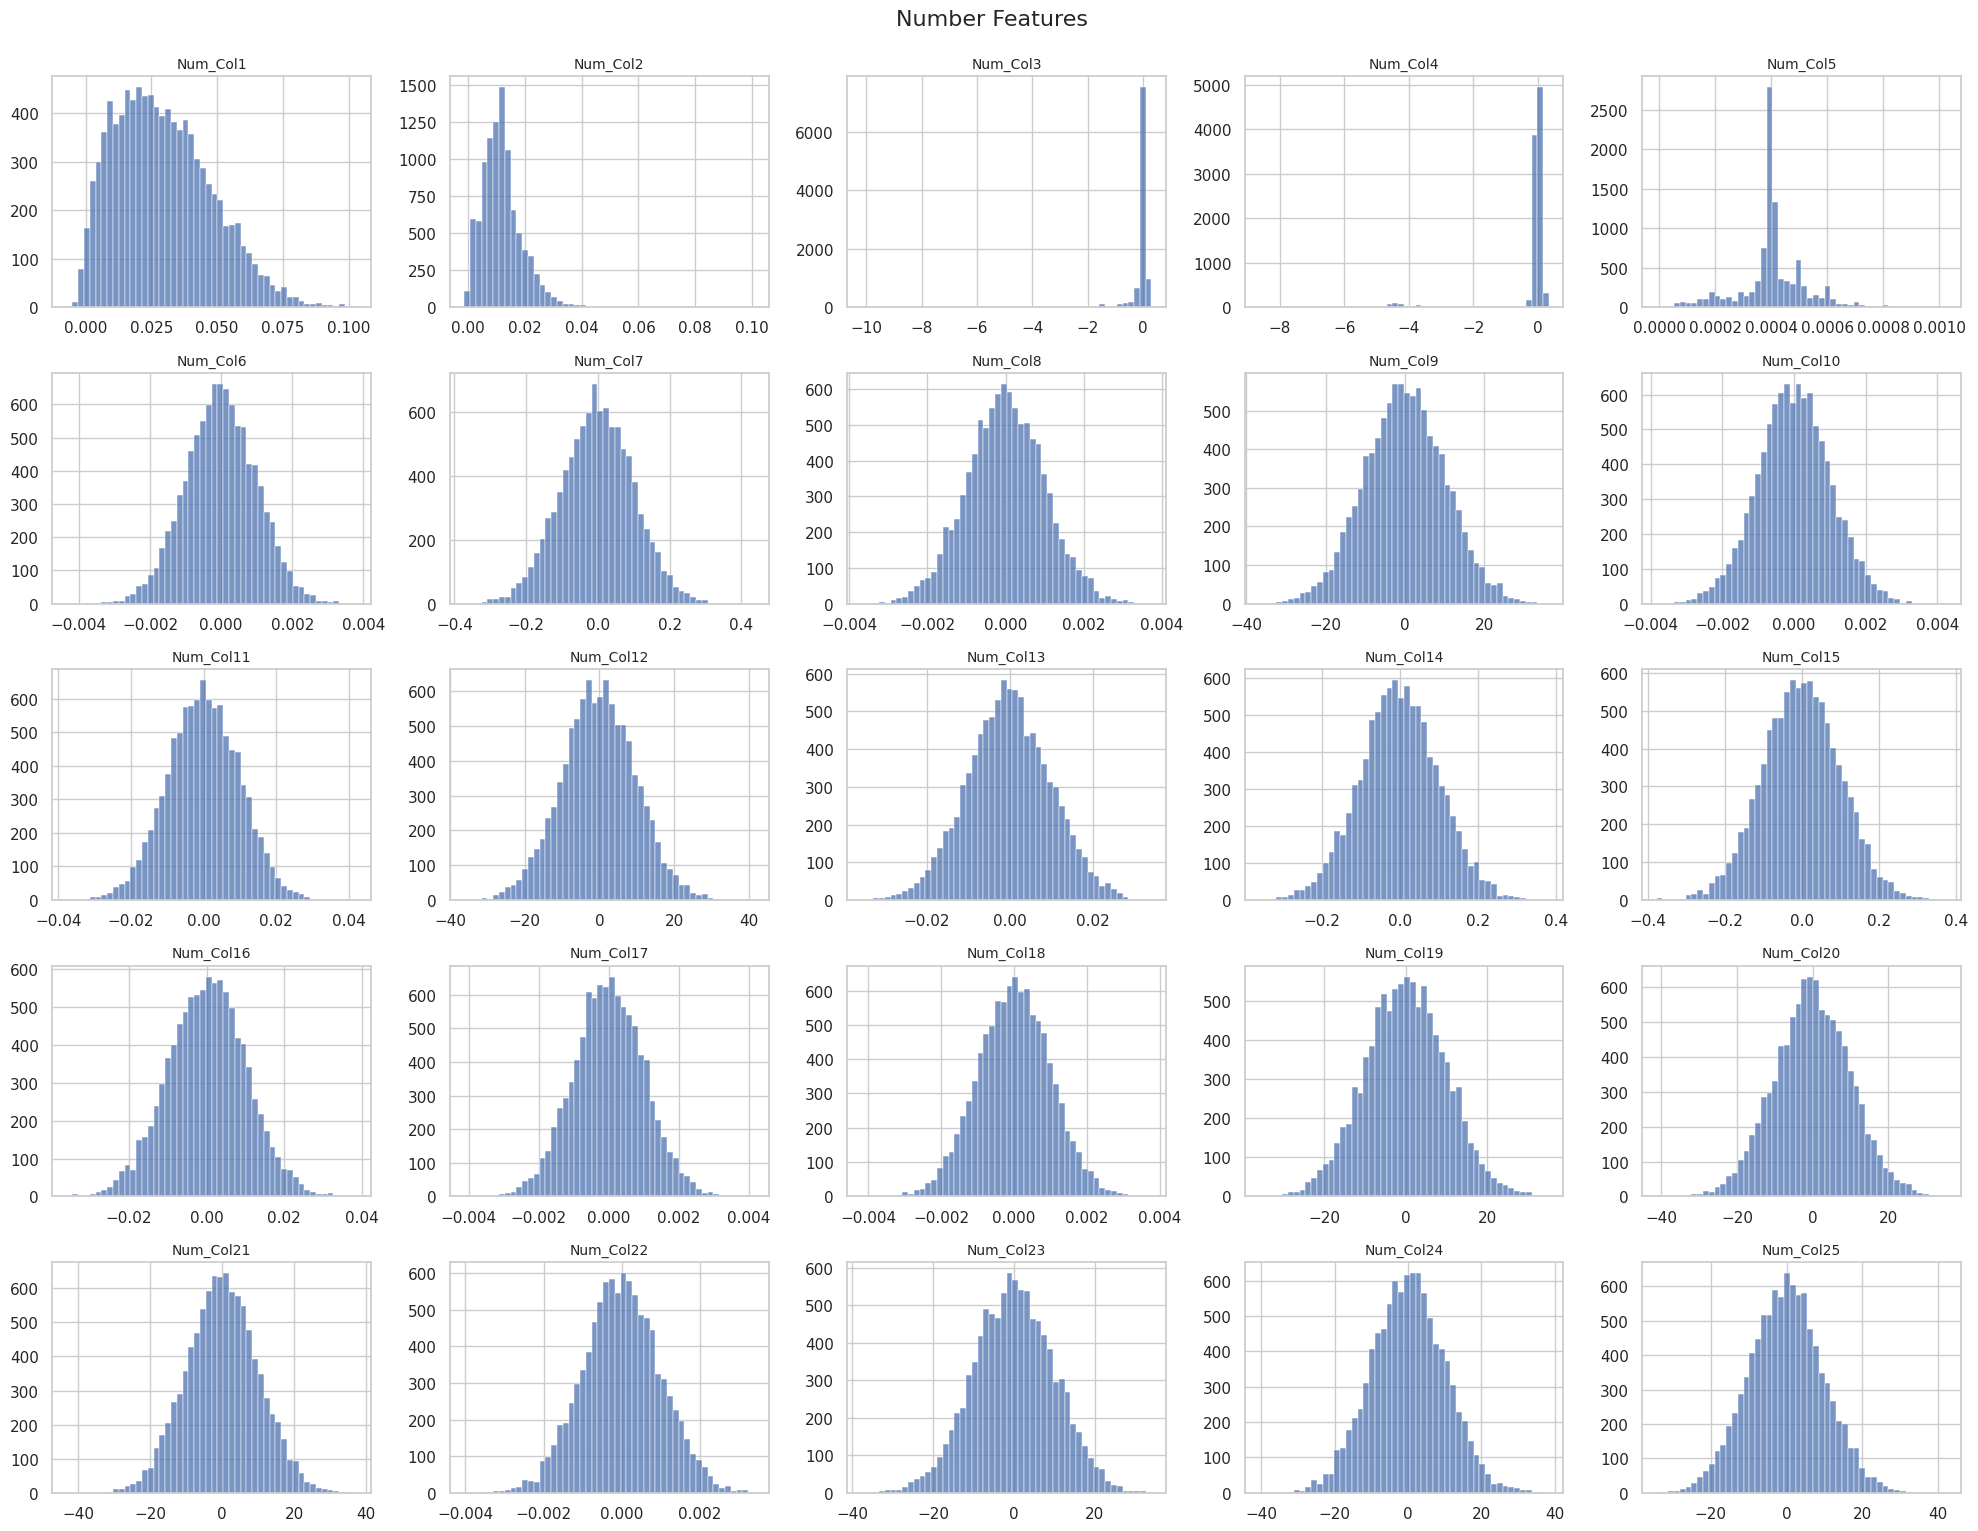

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
sns.set(style="whitegrid")

def plot_histograms(columns, title, X, bins=50):
    n = len(columns)
    cols = 5
    rows = n // cols + (n % cols > 0)
    plt.figure(figsize=(cols * 4, rows * 3))
    for i, col in enumerate(columns):
        plt.subplot(rows, cols, i+1)
        sns.histplot(X[col], kde=False, bins=bins)
        plt.title(col, fontsize=10)
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

plot_histograms(num_features, 'Number Features', X)
# plot_histograms(cat_features, 'Category Features', X)

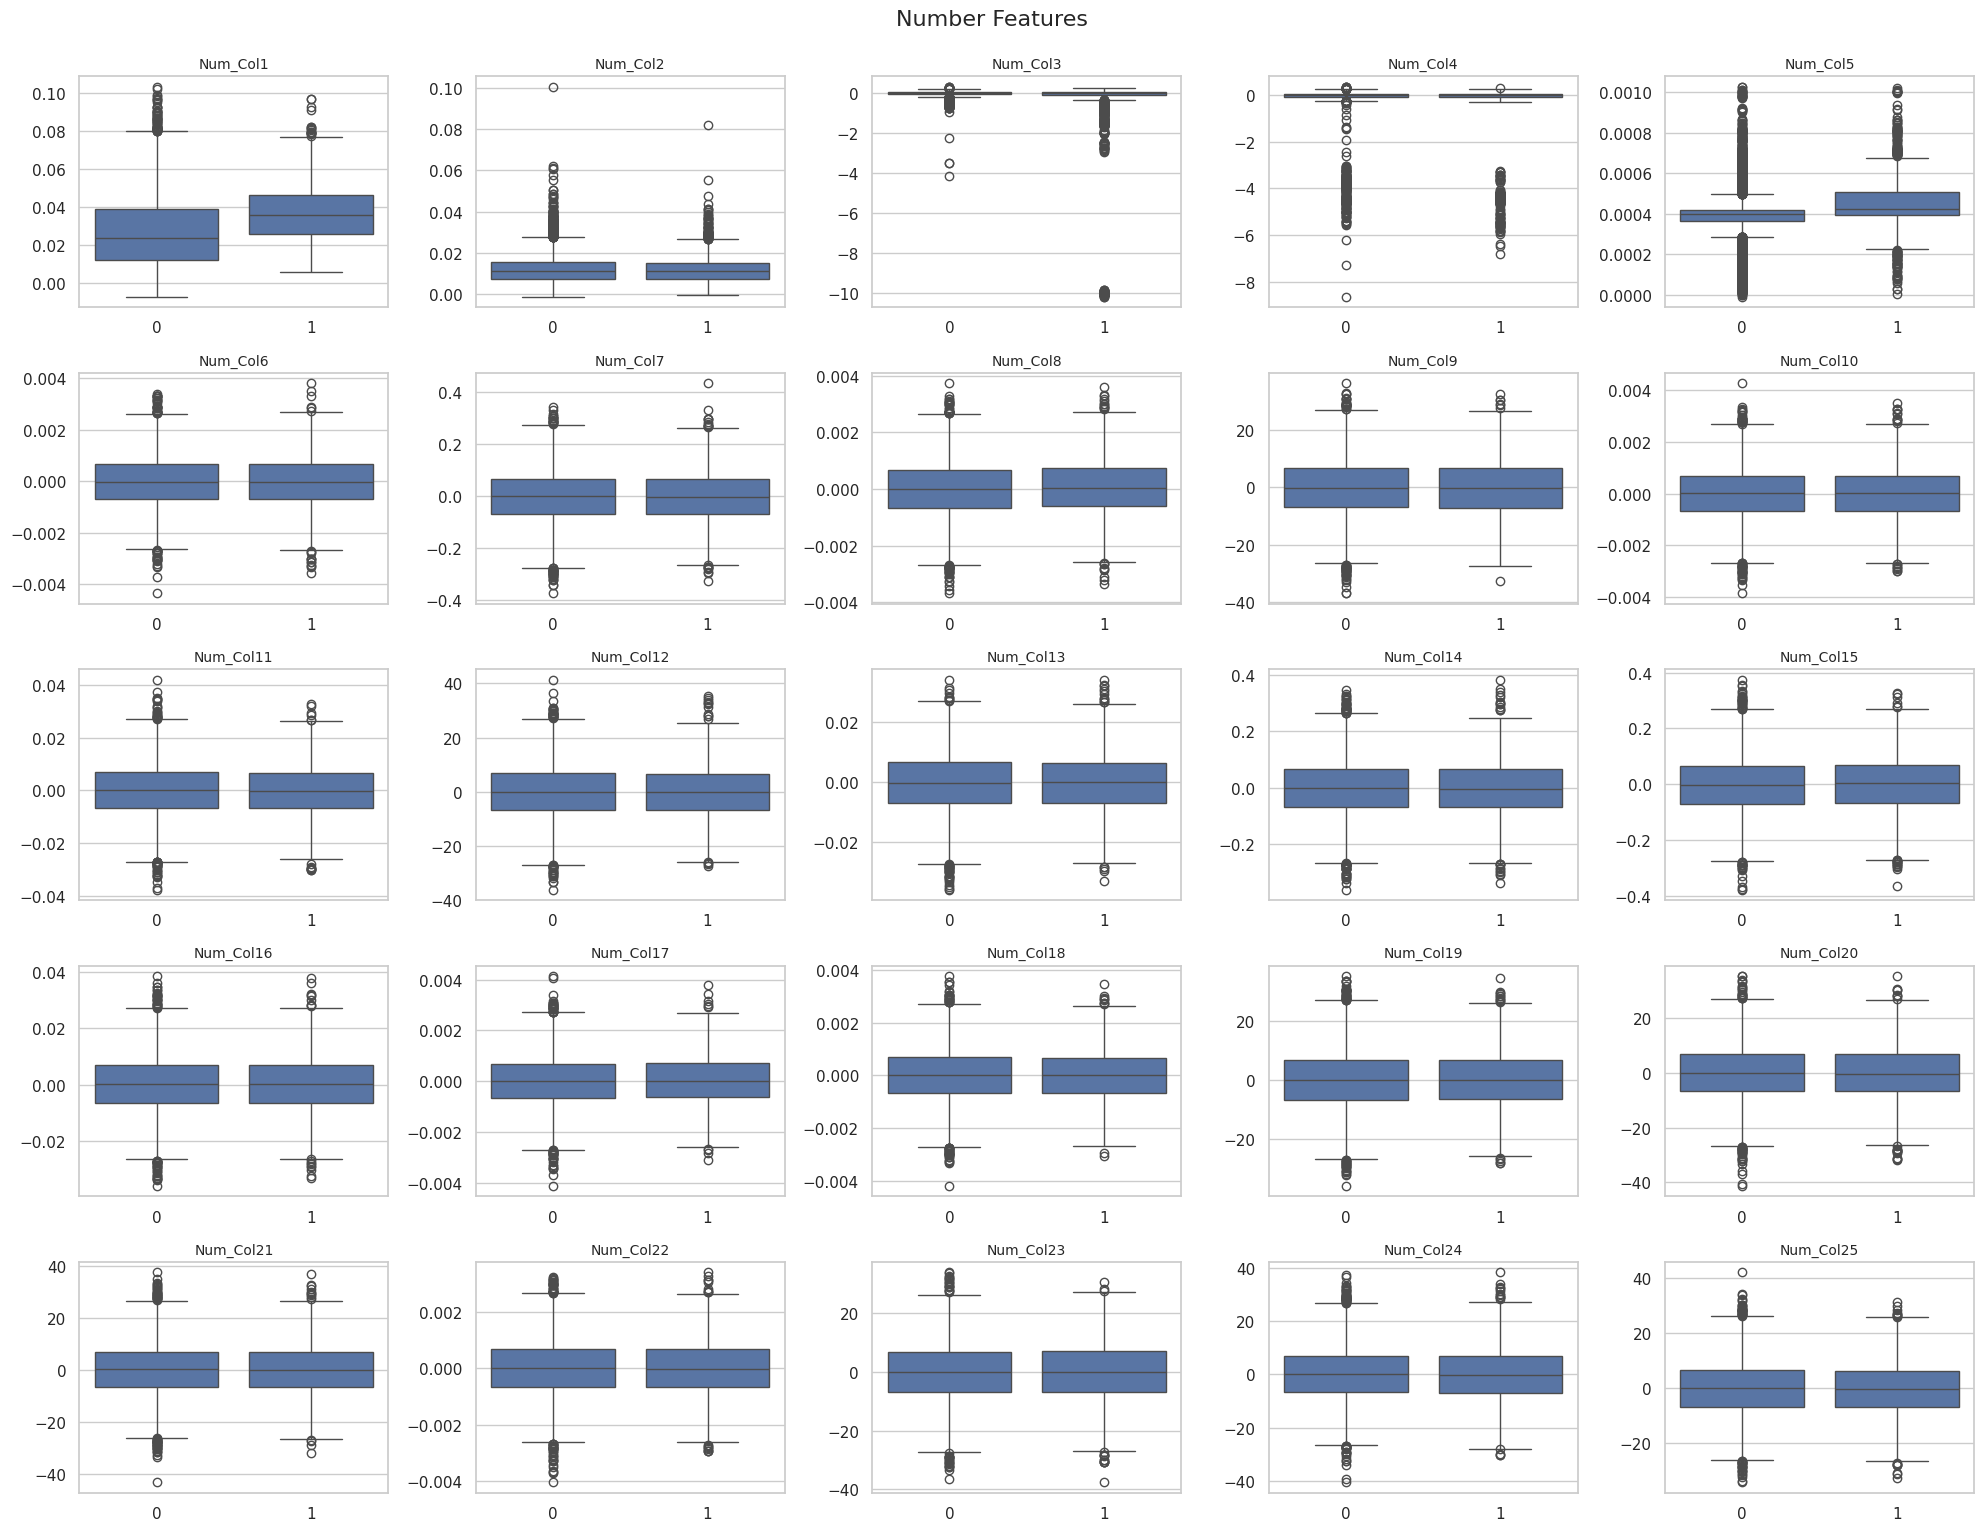

In [14]:
def plot_boxplots(columns, title, df, y):
    n = len(columns)
    cols = 5
    rows = n // cols + (n % cols > 0)
    plt.figure(figsize=(cols * 4, rows * 3))
    for i, col in enumerate(columns):
        plt.subplot(rows, cols, i+1)
        sns.boxplot(x=y, y=col, data=df)
        plt.title(col, fontsize=10)
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

plot_boxplots(num_features, 'Number Features', X, y)

# 2. Preprocessing


## Create Pipelines


In [34]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.base import BaseEstimator, OutlierMixin
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from imblearn import FunctionSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierAdder(BaseEstimator, TransformerMixin):
    def __init__(self, method="",
            sd=3,
            n_neighbors=10, contamination=0.05,
            if_n_estimators=300, if_contamination=0.05, if_random_state=42,
            eps=1e-12):
      self.method = method
      self.sd = sd
      self.n_neighbors = n_neighbors
      self.contamination = contamination
      self.if_n_estimators = if_n_estimators
      self.if_contamination = if_contamination
      self.if_random_state = if_random_state
      self.eps = eps

    def fit(self, X, y=None):
      X = np.asarray(X, dtype=float)

      if self.method == "none":
        return self
      elif self.method == "gaussian":
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0) + self.eps
        return self

      elif self.method == "lof":
        self.det = LocalOutlierFactor(n_neighbors=self.n_neighbors,
                        contamination=self.contamination,
                        novelty=True).fit(X)
        return self
      elif self.method == "iforest":
        self.det_ = IsolationForest(n_estimators=self.if_n_estimators,
                        contamination=self.if_contamination,
                        random_state=self.if_random_state).fit(X)
        return self
      else:
        raise ValueError("method must be 'none'|'gaussian'|'lof'|'iforest'")

    def transform(self, X):
      X = np.array(X, float)
      if self.method == "none":
        is_out = np.zeros((X.shape[0], 1), dtype=int)
      elif self.method == "gaussian":
        z = np.abs((X - self.mean_) / self.std_)
        is_out = (z > self.sd).any(axis=1).astype(int).reshape(-1,1)
      elif self.method == "lof" or self.method == "iforest":
        pred = self.det_.predict(X)
        is_out = (pred == -1).astype(int).reshape(-1,1)
      else:
        raise ValueError("method must be 'none'|'gaussian'|'lof'|'iforest'")

      return np.hstack([X, is_out])

In [1]:
# Imputer
numerical_imputer = SimpleImputer(strategy="median")
nominal_imputer = SimpleImputer(strategy="most_frequent")

# Normalization
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

one_hot = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Outlierhandler
non_outlier_adder = OutlierAdder(method="none")
gaussian_outlier_adder = OutlierAdder(method="gaussian", sd=3.0)
lof_outlier_adder = OutlierAdder(method="lof", n_neighbors=10, contamination=0.05)
isolation_forest_outlier_adder = OutlierAdder(method="iforest", if_n_estimators=300, if_contamination=0.05, if_random_state=42)


param_grid_outlier = [
    # None
    {"pre__numerical__handle_outliers": ["passthrough"]},

    # Gaussian
    {"pre__numerical__handle_outliers": [
        OutlierAdder(method="gaussian", sd=3.0),
        OutlierAdder(method="gaussian", sd=3.5),
        OutlierAdder(method="gaussian", sd=4.0),
    ]},

    # LOF
    {"pre__numerical__handle_outliers":[
        OutlierAdder(method="lof", n_neighbors=10, contamination=0.01),
        OutlierAdder(method="lof", n_neighbors=20, contamination=0.01),
        OutlierAdder(method="lof", n_neighbors=20, contamination=0.05),
        OutlierAdder(method="lof", n_neighbors=30, contamination=0.05),
    ]},

    # Isolation Forest
    {"pre__numerical__handle_outliers": [
        OutlierAdder(method="iforest", if_n_estimators=200, if_contamination=0.01),
        OutlierAdder(method="iforest", if_n_estimators=400, if_contamination=0.01),
        OutlierAdder(method="iforest", if_n_estimators=200, if_contamination=0.05),
        OutlierAdder(method="iforest", if_n_estimators=400, if_contamination=0.05),
    ]},
]

NameError: name 'SimpleImputer' is not defined

In [ ]:
num_pipeline = Pipeline([
    ("handle_missing_values", numerical_imputer),
    ("scaler", "passthrough"),
    ("handle_outliers", "passthrough"),
])

cat_pipeline = Pipeline([
    ("handle_missing_values", nominal_imputer),
    ("encoder", one_hot)
])

pre_pipeline = ColumnTransformer([
    ("numerical", num_pipeline, num_features),
    ("nominal", cat_pipeline, cat_features),
])

pre_grid = [
    {
      "pre__numerical__scaler": [
          "passthrough",
          minmax_scaler,
          standard_scaler
      ],
      "pre__numerical__handle_outliers": [
          "passthrough",
          OutlierAdder(method="gaussian", sd=3.0),
          OutlierAdder(method="lof", n_neighbors=20, contamination=0.05),
          OutlierAdder(method="iforest", if_n_estimators=300, if_contamination=0.05)
      ],
    }
]

def merge_grids(pre_grid, model_grid):
    return [{**p, **m} for p in pre_grid for m in model_grid]

param_knn = merge_grids(pre_grid, models_grids["knn"])


knn_pipeline = Pipeline([
    ("pre", pre_pipeline),
    ("clf", KNeighborsClassifier())
])
param_knn = pre_grid + models_grids["knn"]




models_grids = {
    "knn": [
      {
        "clf": [KNeighborsClassifier()],
        "clf__n_neighbors": [21, 41, 61, 81, 101],
        "clf__weights": ["uniform", "distance"],
        "clf__p": [1, 2]
      }
    ],
    "gnb": [
      {
        "clf": [GaussianNB()],
        "clf__var_smoothing": [1e-12, 1e-10, 1e-8, 1e-6],
      }
    ],
    "dt": [
      {
        "clf": [DecisionTreeClassifier(random_state=42)],
        "clf__max_depth": [None, 10, 20],
        "clf__min_samples_split": [2, 10, 50],
        "clf__min_samples_leaf": [1, 5],
      }
    ],
    "rf": [
      {
        "clf": [RandomForestClassifier(random_state=42, n_jobs=-1)],
        "clf__n_estimators": [200, 400],
        "clf__max_depth": [None, 10, 20],
        "clf__min_samples_split": [2, 10],
        "clf__min_samples_leaf": [1, 2, 5],
      }
    ]
}

In [ ]:
import joblib

def get_best_estimator(pipeline, param_grid, dataset):
    # Need to loop through each training data in order to get a variety of test metrics
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    grid = GridSearchCV(
        pipeline,
        param_grid,
        cv=10,
        scoring="f1_macro",
        n_jobs=-1,
        return_train_score=True,
        verbose=2,
    )
    grid.fit(X, y)
    std = grid.cv_results_["std_test_score"][grid.best_index_]
    return grid.best_score_, grid.best_estimator_, grid.best_params_, std

In [22]:
'''
# OutlierHandler
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

sk = X[num_features].skew(numeric_only=True)              # 偏度
kurt = X[num_features].kurt(numeric_only=True)            # 超额峰度(=Kurtosis-3)

non_gaussian = [c for c in num_features if (abs(sk[c]) > 1) or (kurt[c] > 1)]
non_gaussian_idx = [X.columns.get_loc(c) for c in non_gaussian]
print("非高斯列：", non_gaussian)
print("对应下标：", non_gaussian_idx)

class GaussianOutlierDetector(BaseEstimator, OutlierMixin):
    def __init__(self, sd=3, eps=1e-12):
      self.sd = sd
      self.eps = eps

    def fit(self, X, y=None):
      X = np.asarray(X, float)
      self.mean_ = X.mean(axis=0)
      self.std_ = X.std(axis=0) + self.eps
      return self

    def transform(self, X):
      X = np.asarray(X, float)
      z = np.abs((X - self.mean_) / self.std_)
      is_out = (z > self.sd).any(axis=1)
      return np.where(is_out, -1, 1)


dbscan = DBSCAN()
lof = LocalOutlierFactor()
isolation_forest = IsolationForest()
gaussian_outlier_detector = GaussianOutlierDetector()
'''

非高斯列： ['Num_Col2', 'Num_Col3', 'Num_Col4', 'Num_Col5']
对应下标： [1, 2, 3, 4]


In [ ]:
"""
non_gaussian_features = [21, 26, 32]


# Create a custom transformer to remove outliers for gaussian features
class GaussianOutlierDetector(BaseEstimator, OutlierMixin):
    def __init__(self, sd=3):
      self.sd = sd

    def fit(self, X, y=None):
      self.mean_ = X.mean(axis=0)
      self.std_ = X.std(axis=0) + 1e-12
      return self

    def transform(self, X):
      likelihoods =

      return np.hstack([X, is_out])

    def fit_predict(self, X, y=None):
        likelihoods = np.zeros_like(X, dtype=float)
        filters = np.zeros_like(X, dtype=float)


        for col in range(X.shape[1]):
            # Calculate the mean and standard deviation for the column
            mean = np.mean(X[:, col])
            std_dev = np.std(X[:, col])
            # Calculate the PDF (likelihood) for each row in the column
            likelihoods[:, col] = stats.norm.pdf(X[:, col], loc=mean, scale=std_dev)
            filters[:, col] = stats.norm.pdf((mean+(self.sd*std_dev)), loc=mean, scale=std_dev)

        condition_mask = np.any(likelihoods < filters, axis=1)

        # Convert the condition mask to -1 values being outliers and 1 values being inliers
        condition_mask = np.where(condition_mask, -1, 1)
        return condition_mask


dbscan = DBSCAN()
lof = LocalOutlierFactor()
isolation_forest = IsolationForest()
gaussian_outlier_detector = GaussianOutlierDetector()

'''
def gaussian_outlier_removal(X, y, **kwargs):
    god = GaussianOutlierDetector(**kwargs)
    mask = god.fit_predict(X)
    return X[mask == 1], y[mask == 1]


def lof_outlier_removal(X, y, **kwargs):
    lof = LocalOutlierFactor(**kwargs)
    mask = lof.fit_predict(X)
    return X[mask == 1], y[mask == 1]


def isolation_forest_outlier_removal(X, y, **kwargs):
    isolation_forest = IsolationForest(**kwargs)
    mask = isolation_forest.fit_predict(X)
    return X[mask == 1], y[mask == 1]


def dbscan_outlier_removal(X, y, **kwargs):
    dbscan = DBSCAN(**kwargs)
    mask = dbscan.fit_predict(X)
    return X[mask == 1], y[mask == 1]


def k_means_outlier_removal(X, y, **kwargs):
    k_means = KMeans(**kwargs)
    mask = k_means.fit_predict(X)
    return X[mask == 1], y[mask == 1]
'''
"""